## Importing Libraries

In [2]:
%matplotlib inline 

import os
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', None)

## Loading csv files and reading with pandas

In [3]:
# (encoding = "ISO-8859-1") used to avoid encoding errors.
# four files will be uploaded for salary and statistics.
stats18 = pd.read_csv("data/player_stats_18.csv", encoding = "ISO-8859-1" )
stats19 = pd.read_csv("data/player_stats_19.csv", encoding = "ISO-8859-1" )
salary18 = pd.read_csv("data/player_salary_18.csv", encoding= "ISO-8859-1")
salary19 = pd.read_csv("data/player_salary_19.csv", encoding= "ISO-8859-1")

In [4]:
# Uploading drafting files to get players' experience from them. 
files = ['data/drafted_players_18.csv', 'data/drafted_players_17.csv', 'data/drafted_players_16.csv',
        'data/drafted_players_15.csv', 'data/drafted_players_14.csv', 'data/drafted_players_13.csv', 'data/drafted_players_12.csv',
         'data/drafted_players_11.csv', 'data/drafted_players_11.csv', 'data/drafted_players_10.csv', 'data/drafted_players_09.csv', 
         'data/drafted_players_08.csv', 'data/drafted_players_07.csv', 'data/drafted_players_06.csv', 'data/drafted_players_05.csv',
         'data/drafted_players_04.csv', 'data/drafted_players_03.csv', 'data/drafted_players_02.csv', 'data/drafted_players_01.csv', 
         'data/drafted_players_00.csv', 'data/drafted_players_99.csv', 'data/drafted_players_98.csv']
df =[]
for file in files:
    data = pd.read_csv(file, encoding = "ISO-8859-1", header=1)
    df.append(data)
drafted = pd.concat(df)
drafted = drafted[['Player','username', 'Yrs']]
drafted.dropna(how='any', inplace=True)
drafted.Yrs.count() #number of players that still have rookie contracts which we need to drop from our 2018-19 lists.

1141

In [5]:
stats18.head() # lets see the top 5 rows of 2018 stats

,Rk,Player,Pos,username,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Álex Abrines,SG,abrinal01,25,OKC,31,2,19.0,1.8,5.1,0.357,1.3,4.1,0.323,0.5,1.0,0.500,0.487,0.4,0.4,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,2,Quincy Acy,PF,acyqu01,28,PHO,10,0,12.3,0.4,1.8,0.222,0.2,1.5,0.133,0.2,0.3,0.667,0.278,0.7,1.0,0.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,3,Jaylen Adams,PG,adamsja01,22,ATL,34,1,12.6,1.1,3.2,0.345,0.7,2.2,0.338,0.4,1.1,0.361,0.459,0.2,0.3,0.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,4,Steven Adams,C,adamsst01,25,OKC,80,80,33.4,6.0,10.1,0.595,0.0,0.0,0.000,6.0,10.1,0.596,0.595,1.8,3.7,0.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,5,Bam Adebayo,C,adebaba01,21,MIA,82,28,23.3,3.4,5.9,0.576,0.0,0.2,0.200,3.4,5.7,0.588,0.579,2.0,2.8,0.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9


In [6]:
salary18.head() # lets see the top 5 rows of 2018 player salaries

,Rk,Player,Pos,Team,Salary 2018-19
0,1,Stephen Curry,PG,Golden State Warriors,"$37,457,154"
1,2,Chris Paul,PG,Houston Rockets,"$35,654,150"
2,3,LeBron James,SF,Los Angeles Lakers,"$35,654,150"
3,4,Russell Westbrook,PG,Oklahoma City Thunder,"$35,654,150"
4,5,Blake Griffin,PF,Detroit Pistons,"$32,088,932"


In [7]:
drafted.head()

,Player,username,Yrs
0,Deandre Ayton,aytonde01,2
1,Marvin Bagley,baglema01,2
2,Luka Don?i?,doncilu01,2
3,Jaren Jackson,jacksja02,2
4,Trae Young,youngtr01,2


In [8]:
#Selecting the rows we will be using from salary files
salary18 = salary18[['Player', 'Salary 2018-19']]
salary18.head()

,Player,Salary 2018-19
0,Stephen Curry,"$37,457,154"
1,Chris Paul,"$35,654,150"
2,LeBron James,"$35,654,150"
3,Russell Westbrook,"$35,654,150"
4,Blake Griffin,"$32,088,932"


In [9]:
df = pd.merge(stats18, salary18, on='Player') # Merging 2018 player salary with their stats
df.head()

,Rk,Player,Pos,username,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary 2018-19
0,3,Jaylen Adams,PG,adamsja01,22,ATL,34,1,12.6,1.1,3.2,0.345,0.7,2.2,0.338,0.4,1.1,0.361,0.459,0.2,0.3,0.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2,"$270,014"
1,4,Steven Adams,C,adamsst01,25,OKC,80,80,33.4,6.0,10.1,0.595,0.0,0.0,0.000,6.0,10.1,0.596,0.595,1.8,3.7,0.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9,"$24,157,303"
2,5,Bam Adebayo,C,adebaba01,21,MIA,82,28,23.3,3.4,5.9,0.576,0.0,0.2,0.200,3.4,5.7,0.588,0.579,2.0,2.8,0.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9,"$2,955,840"
3,8,LaMarcus Aldridge,C,aldrila01,33,SAS,81,81,33.2,8.4,16.3,0.519,0.1,0.5,0.238,8.3,15.8,0.528,0.522,4.3,5.1,0.847,3.1,6.1,9.2,2.4,0.5,1.3,1.8,2.2,21.3,"$22,347,015"
4,10,Grayson Allen,SG,allengr01,23,UTA,38,2,10.9,1.8,4.7,0.376,0.8,2.6,0.323,0.9,2.1,0.443,0.466,1.2,1.6,0.750,0.1,0.5,0.6,0.7,0.2,0.2,0.9,1.2,5.6,"$2,074,320"


In [10]:
df.info() # seeing Dtypes of columns and non-null count.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 578 entries, 0 to 577
Data columns (total 32 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rk              578 non-null    int64  
 1   Player          578 non-null    object 
 2   Pos             578 non-null    object 
 3   username        578 non-null    object 
 4   Age             578 non-null    int64  
 5   Tm              578 non-null    object 
 6   G               578 non-null    int64  
 7   GS              578 non-null    int64  
 8   MP              578 non-null    float64
 9   FG              578 non-null    float64
 10  FGA             578 non-null    float64
 11  FG%             576 non-null    float64
 12  3P              578 non-null    float64
 13  3PA             578 non-null    float64
 14  3P%             550 non-null    float64
 15  2P              578 non-null    float64
 16  2PA             578 non-null    float64
 17  2P%             572 non-null    flo

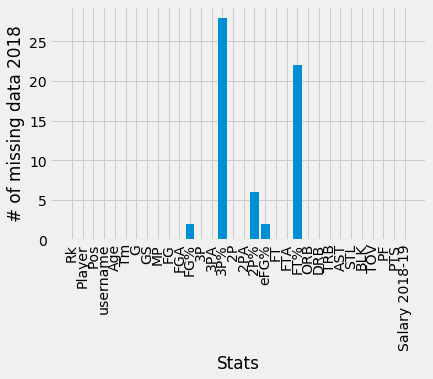

In [11]:
# There were some missing data
# Let's see which stats are the missing data from
missing18 = df.groupby('Rk').apply(lambda x:x.isnull().sum()).sum()
# Bar plot
_ = plt.bar(df.columns, missing18)
_ = plt.xlabel('Stats')
_ = plt.ylabel('# of missing data 2018')
_ = plt.xticks(rotation=90)

In [12]:
# df18[df18.isnull().any(axis=1)]

In [13]:
# getting rid of rows that has null values and selecting the first duplicate which shows the most played team for a player
df = df.fillna(0)

In [14]:
df = df.merge(drafted, how= 'outer', left_on= 'Player', right_on= 'Player')
df.head()

,Rk,Player,Pos,username_x,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary 2018-19,username_y,Yrs
0,3.0,Jaylen Adams,PG,adamsja01,22.0,ATL,34.0,1.0,12.6,1.1,3.2,0.345,0.7,2.2,0.338,0.4,1.1,0.361,0.459,0.2,0.3,0.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2,"$270,014",NaN,NaN
1,4.0,Steven Adams,C,adamsst01,25.0,OKC,80.0,80.0,33.4,6.0,10.1,0.595,0.0,0.0,0.000,6.0,10.1,0.596,0.595,1.8,3.7,0.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9,"$24,157,303",adamsst01,7
2,5.0,Bam Adebayo,C,adebaba01,21.0,MIA,82.0,28.0,23.3,3.4,5.9,0.576,0.0,0.2,0.200,3.4,5.7,0.588,0.579,2.0,2.8,0.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9,"$2,955,840",adebaba01,3
3,8.0,LaMarcus Aldridge,C,aldrila01,33.0,SAS,81.0,81.0,33.2,8.4,16.3,0.519,0.1,0.5,0.238,8.3,15.8,0.528,0.522,4.3,5.1,0.847,3.1,6.1,9.2,2.4,0.5,1.3,1.8,2.2,21.3,"$22,347,015",aldrila01,14
4,10.0,Grayson Allen,SG,allengr01,23.0,UTA,38.0,2.0,10.9,1.8,4.7,0.376,0.8,2.6,0.323,0.9,2.1,0.443,0.466,1.2,1.6,0.750,0.1,0.5,0.6,0.7,0.2,0.2,0.9,1.2,5.6,"$2,074,320",allengr01,2


In [15]:
# dropping some columns that we won't use at all throughout this analysis
df = df.drop(['Rk', 'username_y', 'username_x', 'eFG%', 'PF', 'ORB', 'DRB', 'TOV', 
              'GS', 'FG', '3P', '2P', 'FT', 'BLK', 'FTA', 'FT%', 'STL', '2PA', '2P%'], axis=1)

In [16]:
#renaming some columns for readibility and dropping NaN values, those players are not playing these season.
df = df.rename(columns={'Salary 2018-19': 'salary', 'Yrs': 'Years', 'Pos': 'Position', 'Tm': 'Team',
                        'G':'Game', 'MP':'Minutes', 'TRB':'Rebound', 'AST':'Asist', 'PTS': 'Point'})
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501 entries, 1 to 622
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Player    501 non-null    object 
 1   Position  501 non-null    object 
 2   Age       501 non-null    float64
 3   Team      501 non-null    object 
 4   Game      501 non-null    float64
 5   Minutes   501 non-null    float64
 6   FGA       501 non-null    float64
 7   FG%       501 non-null    float64
 8   3PA       501 non-null    float64
 9   3P%       501 non-null    float64
 10  Rebound   501 non-null    float64
 11  Asist     501 non-null    float64
 12  Point     501 non-null    float64
 13  salary    501 non-null    object 
 14  Years     501 non-null    object 
dtypes: float64(10), object(5)
memory usage: 62.6+ KB


### Removing the '$' signs and commas from the salary columns and converting them to numeric

In [17]:
#Converting Salary and Years serieses to numeric.
df['salary'] = df['salary'].replace({'\$': '', ',': '', ' ': ''}, regex=True)
df['salary'] = pd.to_numeric(df['salary'])
df['Years'] = pd.to_numeric(df['Years'])

In [18]:
#Salary adjustment
def classify_salary(x):
    if x <= 1000000:
        return 0.5
    if x > 1000000 and x <= 3000000:
        return 2
    elif x > 3000000 and x <=5000000:
        return 4
    elif x > 5000000 and x <=7000000:
        return 6
    elif x > 7000000 and x <=9000000:
        return 8
    elif x > 9000000 and x <=11000000:
        return 10
    elif x > 11000000 and x <=13000000:
        return 12
    elif x > 13000000 and x <=15000000:
        return 14
    elif x > 15000000 and x <=17000000:
        return 16
    elif x > 17000000 and x <=19000000:
        return 18
    elif x > 19000000 and x <=21000000:
        return 20
    elif x > 21000000 and x <=23000000:
        return 22
    elif x > 23000000 and x <=25000000:
        return 24
    elif x > 25000000 and x <=27000000:
        return 26
    elif x > 27000000 and x <=29000000:
        return 28
    elif x > 29000000 and x <=31000000:
        return 30
    elif x > 31000000 and x <=33000000:
        return 32
    elif x > 33000000 and x <=35000000:
        return 34
    elif x > 35000000 and x <=37000000:
        return 36
    elif x > 37000000 and x <=39000000:
        return 38
    else:
        return 40

#Age adjustment
def classify_age(x):
    if x >= 18 and x <= 22: 
        return 20
    elif x > 22 and x <=24:
        return 23
    elif x > 24 and x <=26:
        return 25
    elif x > 26 and x <=28:
        return 27
    elif x > 28 and x <=30:
        return 29
    elif x > 30 and x <=32:
        return 31
    elif x > 32 and x <=34:
        return 33
    elif x > 34 and x <=36:
        return 35
    elif x > 36 and x <=38:
        return 37
    elif x > 38 and x <=40:
        return 39
    else:
        return 40

#Years on NBA adjustment
def classify_year(x):
    if x >= 1 and x <= 3: 
        return 2
    elif x > 3 and x <=5:
        return 4
    elif x > 5 and x <=7:
        return 6
    elif x > 7 and x <=9:
        return 8
    elif x > 9 and x <=11:
        return 10
    elif x > 11 and x <=13:
        return 12
    elif x > 13 and x <=15:
        return 14
    elif x > 15 and x <=17:
        return 16
    elif x > 17 and x <=19:
        return 18
    elif x > 19 and x <=21:
        return 20
    else:
        return 22  

#Point adjustment
def classify_point(x):
    if x < 1:
        return 0
    elif x >= 1 and x <= 3: 
        return 2
    elif x > 3 and x <=5:
        return 4
    elif x > 5 and x <=7:
        return 6
    elif x > 7 and x <=9:
        return 8
    elif x > 9 and x <=11:
        return 10
    elif x > 11 and x <=13:
        return 12
    elif x > 13 and x <=15:
        return 14
    elif x > 15 and x <=17:
        return 16
    elif x > 17 and x <=19:
        return 18
    elif x > 19 and x <=21:
        return 20
    elif x > 21 and x <=23:
        return 22
    elif x > 23 and x <=25:
        return 24
    elif x > 25 and x <=27:
        return 26
    elif x > 27 and x <=29:
        return 28
    elif x > 29 and x <=31:
        return 30
    else:
        return 32

df['Sal_Mid'] = df.apply(lambda x: classify_salary(x['salary']),axis=1)
df['Age_Mid'] = df.apply(lambda x: classify_age(x['Age']),axis=1)
df['Year_Mid'] = df.apply(lambda x: classify_year(x['Years']),axis=1)
df['Point_Mid'] = df.apply(lambda x: classify_point(x['Point']),axis=1)

## Cleaning data


### Let's see what column names mean


In [19]:
df.sort_values(by = ['Game'], ascending= False) # sorting values then dropping duplicates.

,Player,Position,Age,Team,Game,Minutes,FGA,FG%,3PA,3P%,Rebound,Asist,Point,salary,Years,Sal_Mid,Age_Mid,Year_Mid,Point_Mid
262,Buddy Hield,SG,26.0,SAC,82.0,31.9,16.6,0.458,7.9,0.427,5.0,2.5,20.7,3844760,4.0,4.0,25,4,20
520,Collin Sexton,PG,20.0,CLE,82.0,31.8,14.7,0.430,3.6,0.402,2.9,3.0,16.7,4068600,2.0,4.0,20,2,16
2,Bam Adebayo,C,21.0,MIA,82.0,23.3,5.9,0.576,0.2,0.200,7.3,2.2,8.9,2955840,3.0,2.0,20,2,8
299,Reggie Jackson,PG,28.0,DET,82.0,27.9,12.8,0.421,5.7,0.369,2.6,4.2,15.4,17043478,9.0,18.0,27,8,16
298,Reggie Jackson,PG,28.0,DET,82.0,27.9,12.8,0.421,5.7,0.369,2.6,4.2,15.4,17043478,9.0,18.0,27,8,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,Jason Smith,C,32.0,NOP,2.0,10.0,4.5,0.222,3.5,0.286,2.0,0.5,4.0,5450000,11.0,6.0,31,10,4
182,Jawun Evans,PG,22.0,OKC,1.0,1.0,1.0,0.000,1.0,0.000,0.0,0.0,0.0,1378242,2.0,2.0,20,2,0
548,Ray Spalding,PF,21.0,DAL,1.0,1.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,184746,1.0,0.5,20,2,0
252,Andrew Harrison,PG,24.0,MEM,1.0,5.0,2.0,0.500,1.0,0.000,0.0,0.0,2.0,1544951,3.0,2.0,23,2,2


In [20]:
# to see if we have any duplicate entries, which are most probably because of changing team during mid-season.
number_of_duplicated_names= len(df)-df['Player'].nunique()
number_of_duplicated_names

164

In [21]:
# getting rid of duplicate values and selecting the first duplicate which shows the most played team for a player
df = df.drop_duplicates(subset = 'Player')
len(df)

337

In [22]:
#higher_4 = df['Years'] >= 4
#df = df[higher_4]
df.groupby('Position')['Player'].count()

Position
C        69
C-PF      2
PF       67
PF-SF     2
PG       66
SF       48
SF-SG     1
SG       81
SG-PF     1
Name: Player, dtype: int64

In [23]:
# Some players have two position specified. We are sleecting the first position.
def classify_position(x):
    if x == 'C-PF':
        return 'C'
    elif x == 'PF-SF':
        return 'PF'
    elif x == 'SF-SG':
        return 'SF'
    elif x == 'SG-PF':
        return 'SG'
    else:
        return x
df['Position'] = df.apply(lambda x: classify_position(x['Position']),axis=1)

In [24]:
# C=Center, PG=PointGuard PF=PowerForward, SF=SmallForward, SG=ShootingGuard


### Players who played less than 10 minutes will be eliminated based on histogram results,

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027DE8280108>]],
      dtype=object)

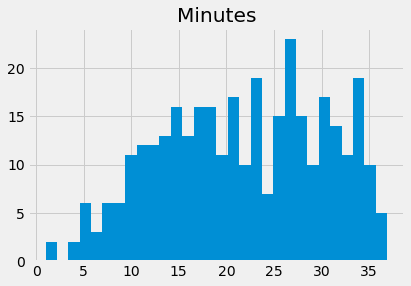

In [25]:
df.hist(column ='Minutes', bins=30) # Let's see the distrubution of Minutes played.

### Players who played less than 20 games will be eliminated based on histogram results, because there are 82 games and 20 games is almost quarter of the season for 2018-19 season

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027DE8369288>]],
      dtype=object)

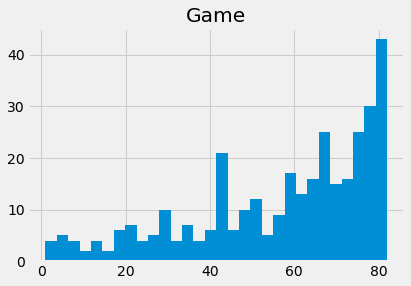

In [26]:
df.hist(column='Game', bins=30)

In [27]:
# minimum Wage in NBA is 1.5 Million $. That's why we will drop those who have less than this. 
#wage18 = df['salary'] > 1
#df = df[wage18]

In [28]:
# Removing players who played less than 10 games per season
#games18 = df['G'] >= 20
#df = df[games18]

In [29]:
df.describe() #information about the dataframe including the data types of each column and memory usage of the entire data.

,Age,Game,Minutes,FGA,FG%,3PA,3P%,Rebound,Asist,Point,salary,Years,Sal_Mid,Age_Mid,Year_Mid,Point_Mid
count,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,3.370000e+02,337.000000,337.000000,337.000000,337.000000,337.000000
mean,26.275964,56.934718,21.783086,8.105638,0.456184,2.820475,0.295510,4.136499,2.259050,10.056677,7.981259e+06,7.109792,8.056380,25.652819,6.718101,9.982196
std,4.469918,21.562931,8.499603,4.729693,0.086571,2.203453,0.122566,2.603787,1.910447,6.348342,8.544865e+06,4.272328,8.501826,4.568389,4.339128,6.348016
min,19.000000,1.000000,1.000000,0.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.709200e+04,0.000000,0.500000,20.000000,2.000000,0.000000
25%,23.000000,43.000000,15.100000,4.600000,0.411000,1.100000,0.280000,2.300000,1.000000,5.600000,1.567707e+06,3.000000,2.000000,23.000000,2.000000,6.000000
50%,26.000000,64.000000,21.900000,7.100000,0.444000,2.600000,0.333000,3.700000,1.600000,8.500000,3.940402e+06,6.000000,4.000000,25.000000,6.000000,8.000000
75%,30.000000,75.000000,28.600000,10.700000,0.493000,4.100000,0.365000,5.200000,3.000000,13.400000,1.200000e+07,10.000000,12.000000,29.000000,10.000000,14.000000
max,42.000000,82.000000,36.900000,24.500000,1.000000,13.200000,0.529000,15.600000,10.700000,36.100000,3.745715e+07,22.000000,38.000000,40.000000,22.000000,32.000000


## Now our data is ready for exploratory data analysis(EDA).

In [30]:
df.columns # The columns we have in our df

Index(['Player', 'Position', 'Age', 'Team', 'Game', 'Minutes', 'FGA', 'FG%',
       '3PA', '3P%', 'Rebound', 'Asist', 'Point', 'salary', 'Years', 'Sal_Mid',
       'Age_Mid', 'Year_Mid', 'Point_Mid'],
      dtype='object')

We are assuming that C position is less than SG and PG becaue SG shooting guard and PG point guard regularly switch their position throughout the game, which I believe will affect their MP minutes played in the game because if your player can play more than one position than you can keep him iin the game more. 

In [31]:
#WWhat we witnessed is that so many SF players started playing as C position in 2019. it can be seen in the Data. 
pos_count = df['Position'].value_counts()
pos_count

SG    82
C     71
PF    69
PG    66
SF    49
Name: Position, dtype: int64

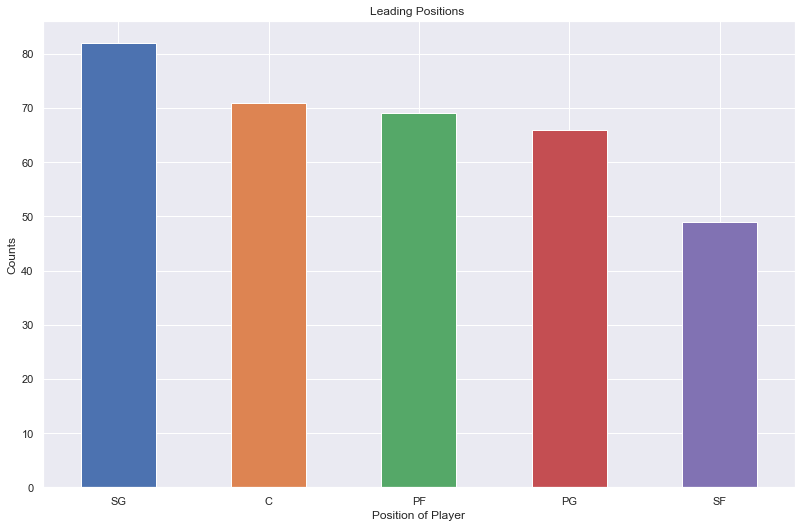

In [32]:
sns.set(font_scale = 3)
sns.set(rc={'figure.figsize':(12,8)})
visual1=pos_count.plot(kind='bar', color=['C0','C1','C2','C3','C4'])
visual1.set_ylabel('Counts')
visual1.set_xlabel('Position of Player')
visual1.set_title('Leading Positions ')
visual1.set_xticklabels(visual1.get_xticklabels(), rotation = 0)
plt.show()

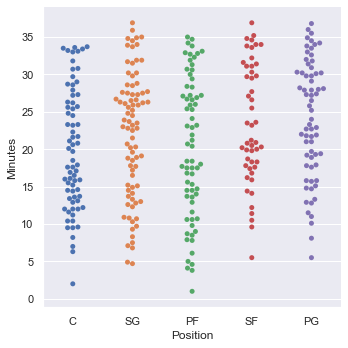

In [33]:
# As we can see, C posiiton and PF positions are playing less minutes than others. 
# C and PF players are relatively longer and slower than SF, PG, SG players because they weigh more and  are taller.
sns.catplot(x="Position", y='Minutes', kind = 'swarm', data=df);

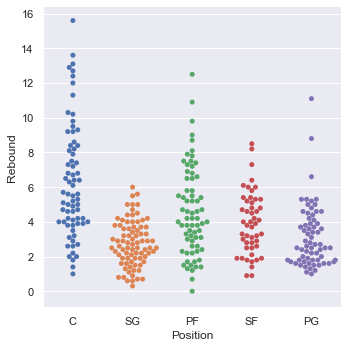

In [34]:
# Tall players are able to collect more rebound than other players.
sns.catplot(x="Position", y='Rebound', kind = 'swarm', data=df);

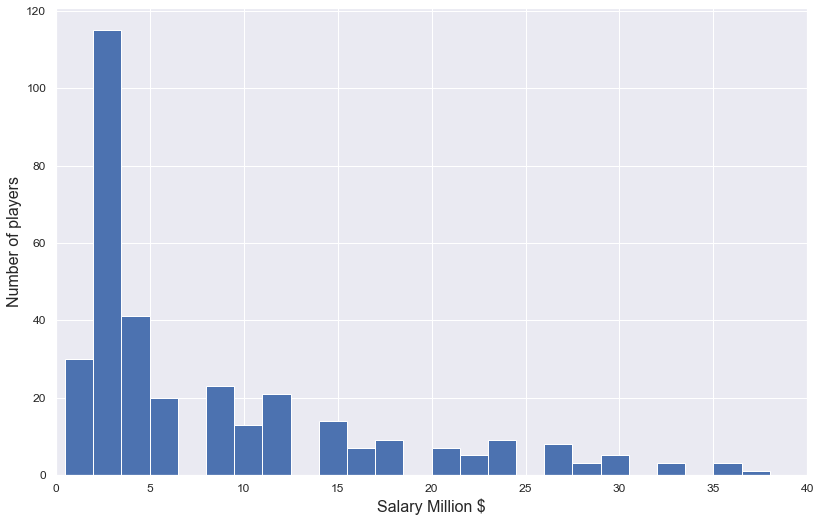

In [35]:
# Check the distribution of salary
_ = plt.hist(df['Sal_Mid'], bins=25)
_ = plt.xlabel('Salary Million $', fontsize=16)
_ = plt.ylabel('Number of players', fontsize=16)
_ = plt.xticks(fontsize=12)
_ = plt.yticks(fontsize=12)
_ = plt.xlim(0,40)

In [36]:
poss = df.groupby('Position').mean()
poss

,Age,Game,Minutes,FGA,FG%,3PA,3P%,Rebound,Asist,Point,salary,Years,Sal_Mid,Age_Mid,Year_Mid,Point_Mid
Position,,,,,,,,,,,,,,,,
C,26.873239,56.014085,19.888732,6.784507,0.534718,0.901408,0.175296,6.319718,1.446479,9.374648,8.284385e+06,7.887324,8.415493,26.267606,7.380282,9.323944
PF,26.420290,54.826087,20.159420,7.075362,0.460696,2.611594,0.314232,4.586957,1.476812,8.860870,7.762332e+06,7.260870,7.702899,25.739130,6.869565,8.753623
PG,26.242424,59.696970,24.027273,9.578788,0.419621,3.537879,0.314803,3.157576,4.328788,11.453030,8.833254e+06,7.121212,8.916667,25.530303,6.636364,11.303030
SF,26.285714,57.612245,23.451020,8.534694,0.443347,3.302041,0.337918,3.942857,2.040816,10.518367,9.108709e+06,7.102041,9.122449,25.734694,7.102041,10.489796
SG,25.658537,56.878049,21.986585,8.674390,0.421488,3.792683,0.342976,2.770732,2.085366,10.253659,6.543541e+06,6.304878,6.713415,25.097561,5.853659,10.219512


In [37]:
pos_median = df.groupby('Position').median()
pos_median

,Age,Game,Minutes,FGA,FG%,3PA,3P%,Rebound,Asist,Point,salary,Years,Sal_Mid,Age_Mid,Year_Mid,Point_Mid
Position,,,,,,,,,,,,,,,,
C,26.0,66.0,18.50,5.90,0.5350,0.20,0.188,5.60,1.20,8.2,4350000,7.0,4.0,25,6,8
PF,25.0,61.0,20.40,6.20,0.4550,2.60,0.343,4.20,1.20,7.3,4320500,6.0,4.0,25,6,8
PG,26.0,63.0,24.60,8.35,0.4265,2.80,0.333,2.65,3.75,9.7,4257740,6.0,4.0,25,6,10
SF,25.0,60.0,21.20,6.80,0.4410,3.00,0.333,3.90,1.50,8.0,5757120,6.0,6.0,25,6,8
SG,25.5,64.0,23.35,7.90,0.4190,3.65,0.351,2.65,1.70,8.9,3193380,6.0,4.0,25,6,8


In [38]:
#Means of salary, point, rebound, field goal attemps based on position.
columns = ['Position','Age', 'Years', 'Minutes', 'FGA', 'Point', 'Asist', 'salary' ]
a = df.groupby(by=('Position'), as_index=False).mean()
a[columns]


,Position,Age,Years,Minutes,FGA,Point,Asist,salary
0,C,26.873239,7.887324,19.888732,6.784507,9.374648,1.446479,8.284385e+06
1,PF,26.420290,7.260870,20.159420,7.075362,8.860870,1.476812,7.762332e+06
2,PG,26.242424,7.121212,24.027273,9.578788,11.453030,4.328788,8.833254e+06
3,SF,26.285714,7.102041,23.451020,8.534694,10.518367,2.040816,9.108709e+06
4,SG,25.658537,6.304878,21.986585,8.674390,10.253659,2.085366,6.543541e+06


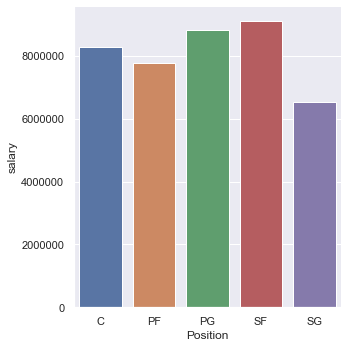

In [39]:
# As expected PG and SF players are the most paid one and also best scorers ones.
sns.catplot(x="Position", y='salary', kind = 'bar', data=a);

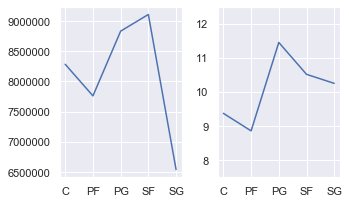

In [40]:
# As expected PG and SF players are the most paid one and also best scorers ones.
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
axes[0].plot(a['Position'], a['salary'])
axes[1].plot(a['Position'], a['Point'])
plt.ylim(7.5,12.5)
fig.tight_layout()

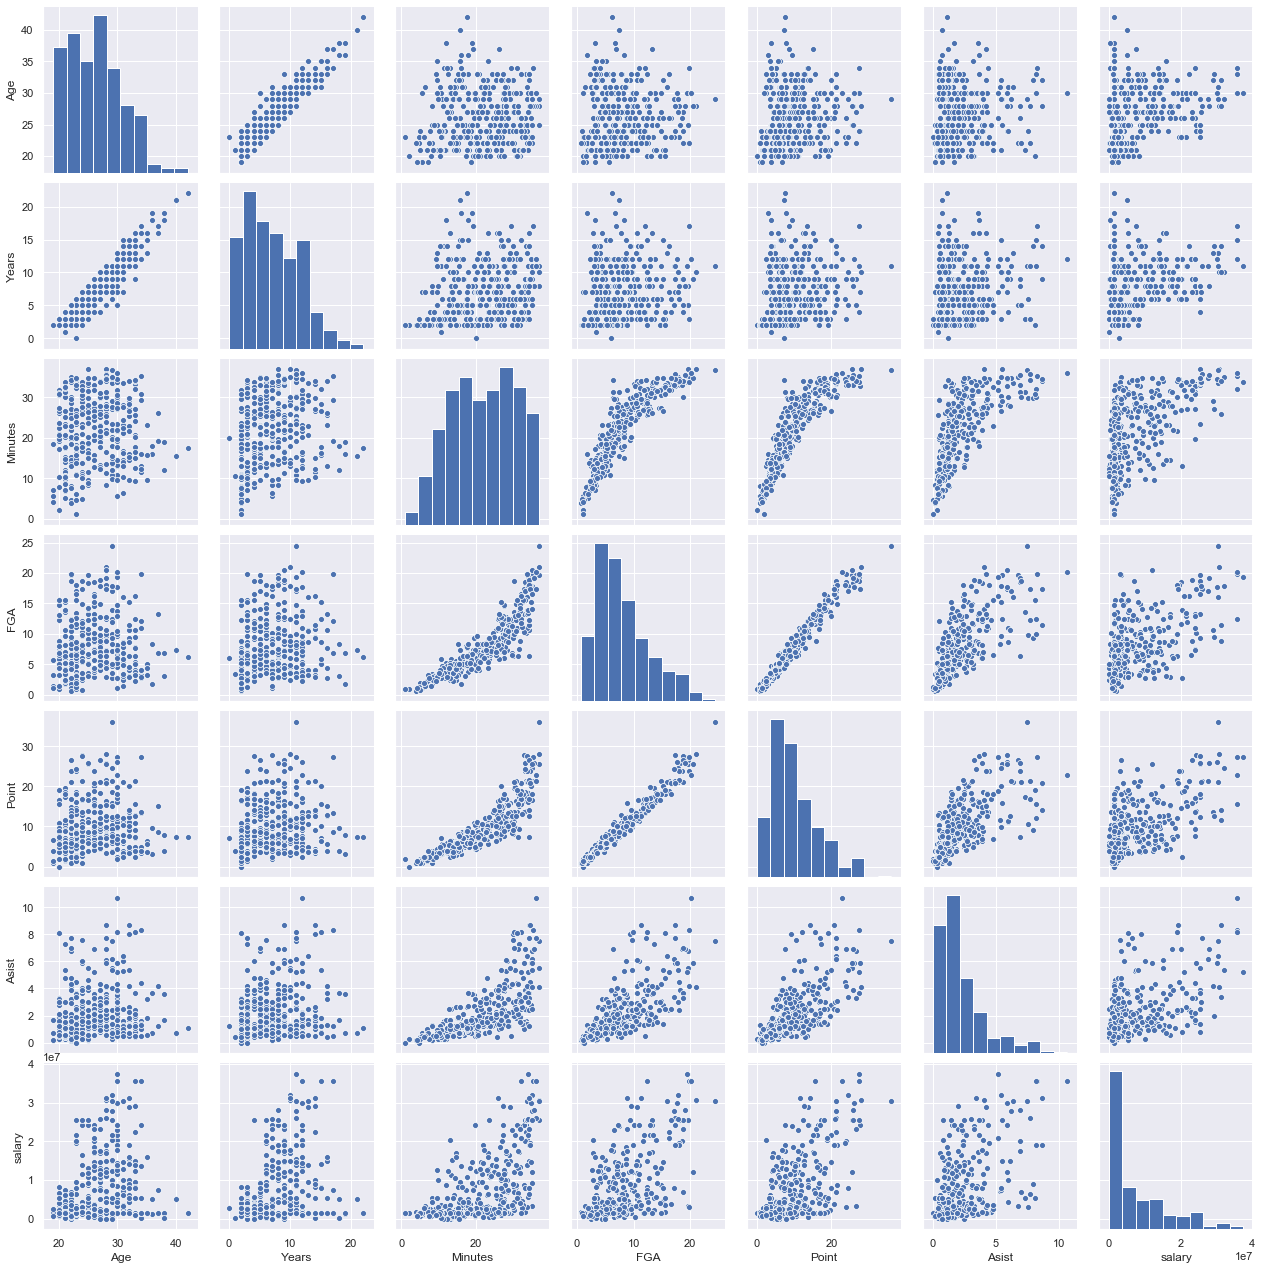

In [41]:
#Let's look at the correlations between stats on pairplot.

sns.pairplot(df[columns])

Since ther are a lot of stats, it is hard to see the actual correlations. But there are distinct features that correlate very well. Like MP minutes played correlate with FG field goal made becasue the more time palyer stays in hte court the more likely he will shoot. The same thing with PTS points. The more Field goal attemp the more points. 

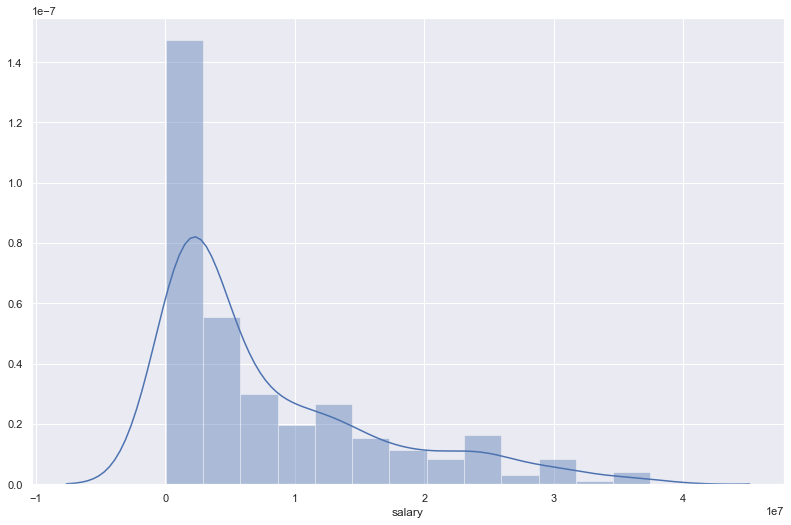

In [42]:
#distrubiton of salary.
sns.distplot(df['salary'])

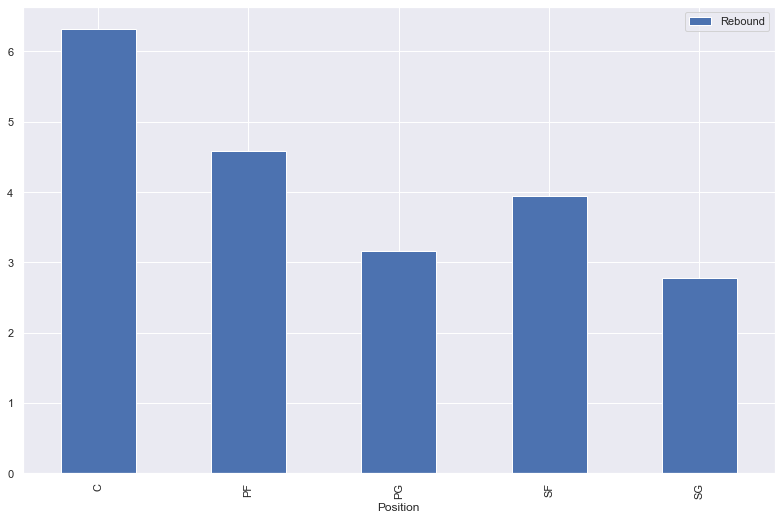

In [43]:
#As expected C players are able to collect more rebounds because it is their main job on the court.
df.groupby(["Position"], as_index=False).mean().plot(x='Position', y='Rebound', kind='bar')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


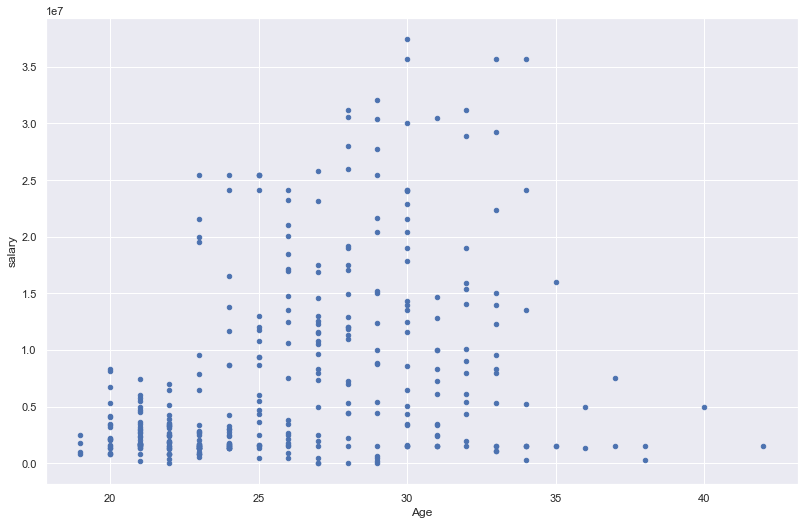

In [44]:
# we have 2 outliers which are older than 40. we can say Ages 35-40 are the retirement ages for most players. 
df.plot(x='Age', y='salary', kind='scatter')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


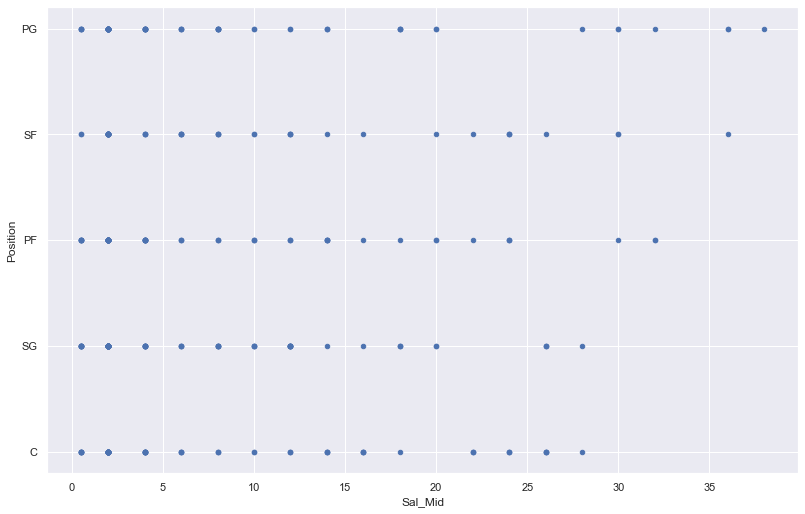

In [45]:
df.plot(x='Sal_Mid', y='Position', kind='scatter')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


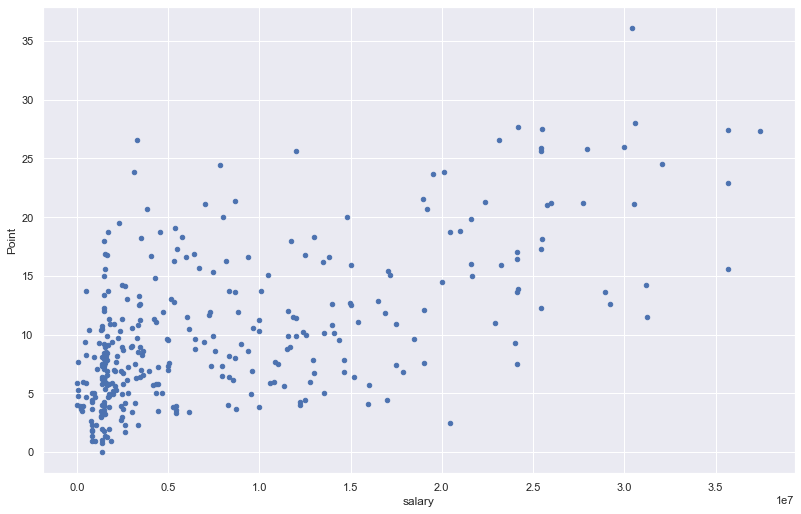

In [46]:
df.plot(x='salary', y='Point', kind='scatter')

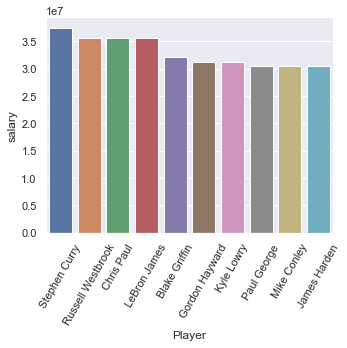

In [47]:
# Most earning players. #Stephen Curry has the best salary in 2018 season
best_salary = df.sort_values(by = ['salary'], ascending= False).head(10)
g = sns.catplot(x="Player", y='salary', kind = 'bar', data=best_salary);
g.set_xticklabels(rotation=60)
plt.tight_layout()
plt.show()

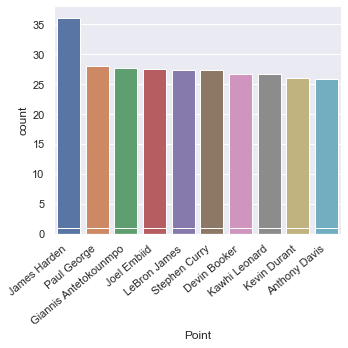

In [48]:
# Most scoring players. #James Harden is the best scorer in 2018 season
best_scorer = df.sort_values(by = ['Point'], ascending= False).head(10)
sns.catplot(x="Player", y='Point', kind = 'bar', data=best_scorer);
best_scorer = best_scorer[['Player', 'Point']]
ax = sns.countplot(x="Player", data=best_scorer)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlabel('Point')
plt.tight_layout()
plt.show()

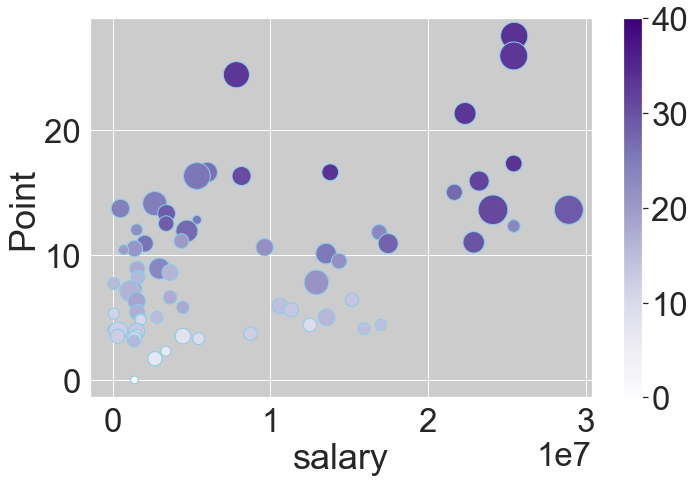

In [127]:
def plotpos(pos):
    dff = df[df.Position == pos].sort_values('Point',ascending=False)
    area = 200 *dff.Asist
    color = dff.Minutes
    edgecolor = dff.Position.map({'C': 'skyblue','PG': 'gold','PF': 'palegreen','SG': 'coral', 'SF' : 'dimgrey'})
    
    dff.plot.scatter('salary','Point',
                      s=area, c=color,
                      colormap=mpl.cm.get_cmap('Purples'), vmin=0, vmax=40,
                      linewidths=1, edgecolors=edgecolor, sharex=False, figsize=(10,6.5) )
    
plotpos('C')

In [128]:
from ipywidgets import interact, widgets
interact(plotpos, pos =['C', 'PG', 'SF', 'SG', 'PF'])

interactive(children=(Dropdown(description='pos', options=('C', 'PG', 'SF', 'SG', 'PF'), value='C'), Output())…

<function __main__.plotpos(pos)>

In [51]:
df['log10_Salary'] = np.log10(df['salary'])

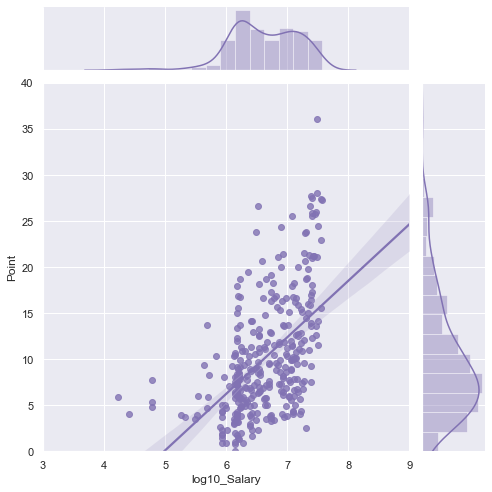

In [52]:
# Let's see linear regression with marginal distributions of Salary and Points
sns.set(style="darkgrid")

g = sns.jointplot("log10_Salary", "Point", data=df,
                  kind="reg", truncate=False,
                  xlim=(3, 9), ylim=(0, 40),
                  color="m", height=7)

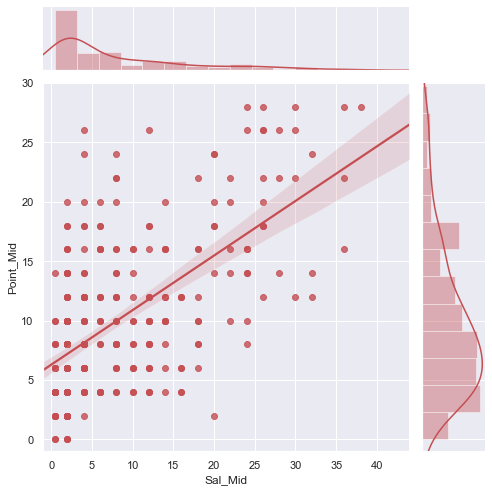

In [53]:
# Let's see linear regression with marginal distributions of Salary and Field goal attempts
sns.set(style="darkgrid")

g = sns.jointplot("Sal_Mid", "Point_Mid", data=df,
                  kind="reg", truncate=False,
                  xlim=(-1, 44), ylim=(-1, 30),
                  color="r", height=7)

In [54]:
# Percentile shows that %97.5 of NBA players are 35 years old or younger. We can say retirement age is close to 35
np.percentile(df['Age'], (2.5, 25,50,75,97.5))

array([20., 23., 26., 30., 35.])

In [55]:
np.std(df['salary'])

8532178.067561936

In [56]:
np.cov(df['salary'], df['Point'])[0,1]

33127442.447969645

In [57]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor
r = pearson_r(df['salary'], df['Point'])

# Print the result
print(r)

0.6106921611036353


## Feature engineering

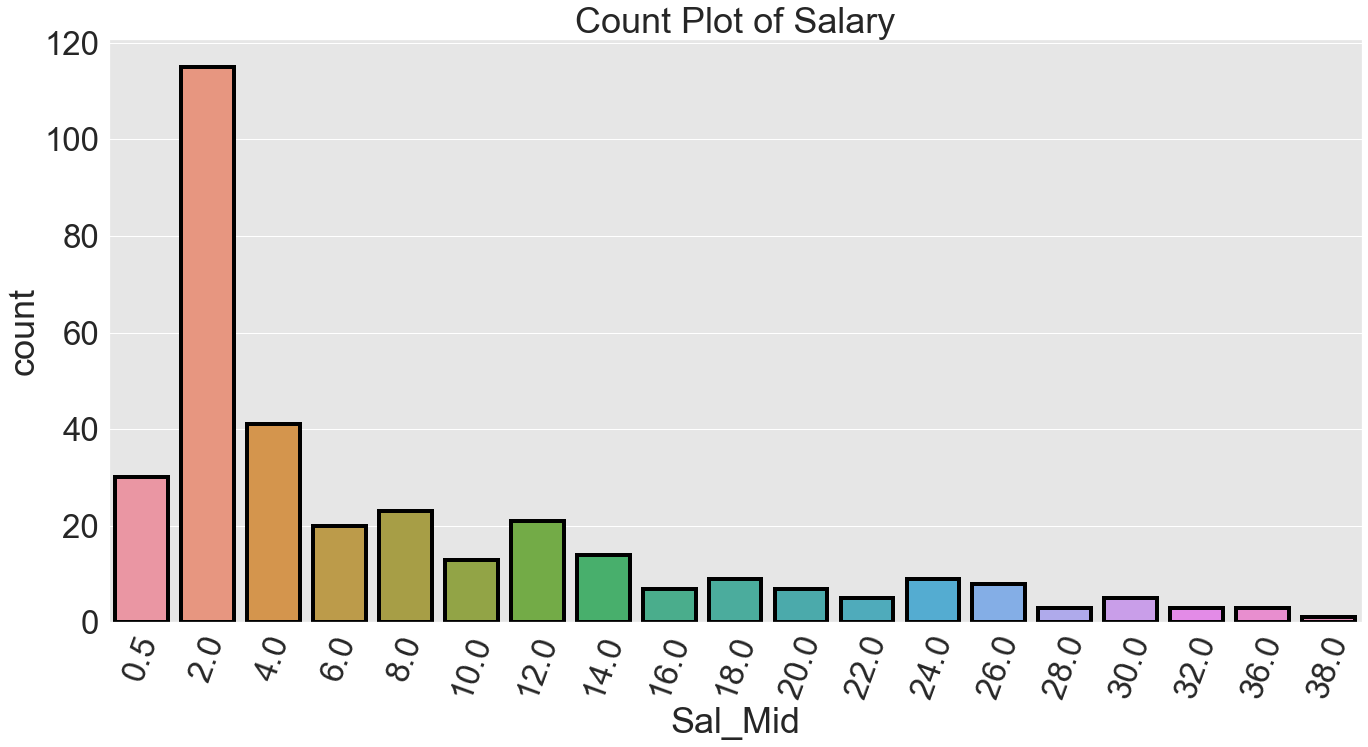

In [58]:
sns.set(font_scale = 3)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.figure(figsize=(20, 10))
mpl.rcParams['font.size'] = 30.0
sns.countplot(x=df.Sal_Mid, edgecolor="black", linewidth=4,)
plt.title("Count Plot of Salary")
plt.xticks(rotation=70)
plt.show()

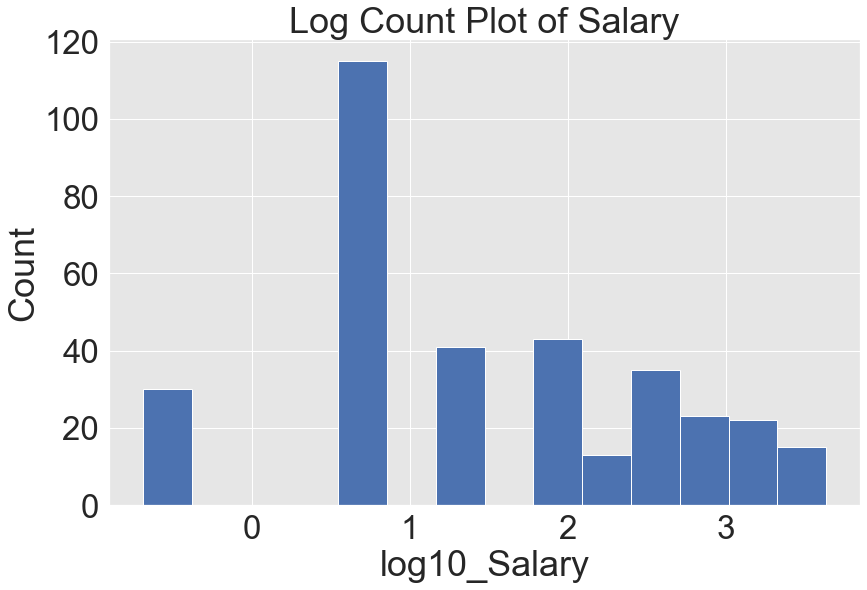

In [59]:
plt.hist(np.log(df.Sal_Mid), bins=14)
plt.title("Log Count Plot of Salary")
plt.xlabel("log10_Salary")
plt.ylabel("Count")
plt.show()

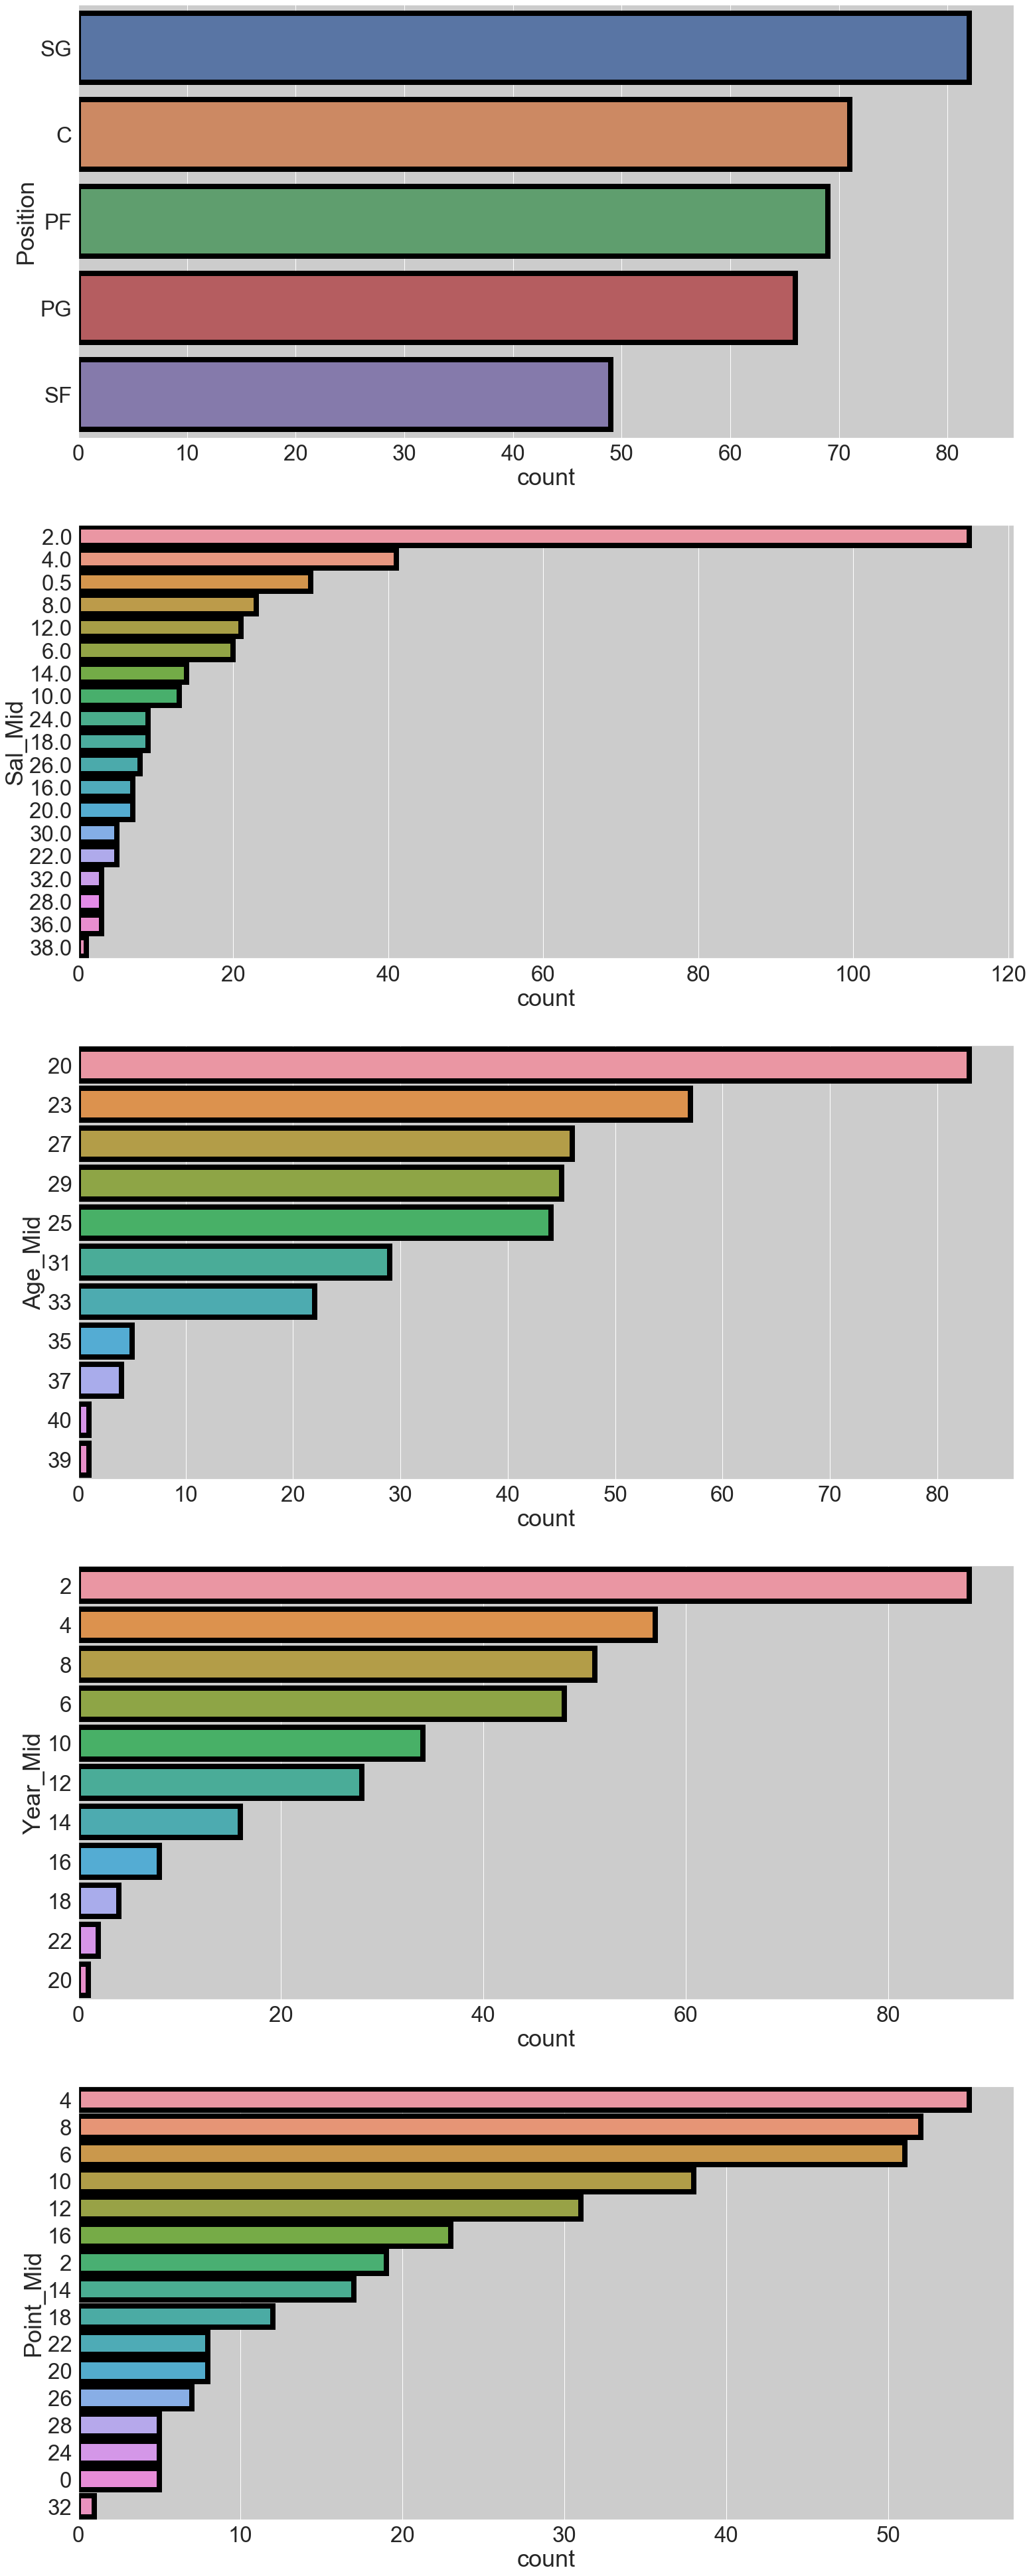

In [112]:
columns = ['Position', 'Sal_Mid', 'Age_Mid', 'Year_Mid', 'Point_Mid']
df1 = df[columns]
sns.set_style("darkgrid", {"axes.facecolor": ".8"})
mpl.rcParams['font.size'] = 50.0
cols = df1.columns
num_of_plots = len(cols)
fig, ax = plt.subplots(num_of_plots,1, figsize=(4.5*num_of_plots, 13*num_of_plots))

z = 0
for column in df1.columns:
    sns.countplot(y = df1[column], edgecolor = "black", 
                  linewidth = 8, ax = ax[z], order=df1[column].value_counts().index)
    z += 1     
fig.show()

## User-Defined Functions for Statistics

In [132]:
# We drop the rookie players becaue, when players are drafted they sign rookie contract,
# which is and reflecting the actual salary even if player is doing perfect.
df1 = df[df['Years'] > 3] 
df1.head()

,Player,Position,Age,Team,Game,Minutes,FGA,FG%,3PA,3P%,Rebound,Asist,Point,salary,Years,Sal_Mid,Age_Mid,Year_Mid,Point_Mid,log10_Salary
1,Steven Adams,C,25.0,OKC,80.0,33.4,10.1,0.595,0.0,0.000,9.5,1.6,13.9,24157303,7.0,24.0,25,6,14,7.383048
3,LaMarcus Aldridge,C,33.0,SAS,81.0,33.2,16.3,0.519,0.5,0.238,9.2,2.4,21.3,22347015,14.0,22.0,33,14,22,7.349220
6,Al-Farouq Aminu,PF,28.0,POR,81.0,28.3,7.3,0.433,3.5,0.343,7.5,1.3,9.4,6957105,10.0,6.0,27,10,10,6.842429
7,Justin Anderson,SF,25.0,ATL,48.0,9.6,3.3,0.408,1.6,0.312,1.8,0.5,3.7,2516048,5.0,2.0,25,4,4,6.400719
8,Kyle Anderson,SF,25.0,MEM,43.0,29.8,6.4,0.543,0.8,0.265,5.8,3.0,8.0,8641000,6.0,8.0,25,6,8,6.936564


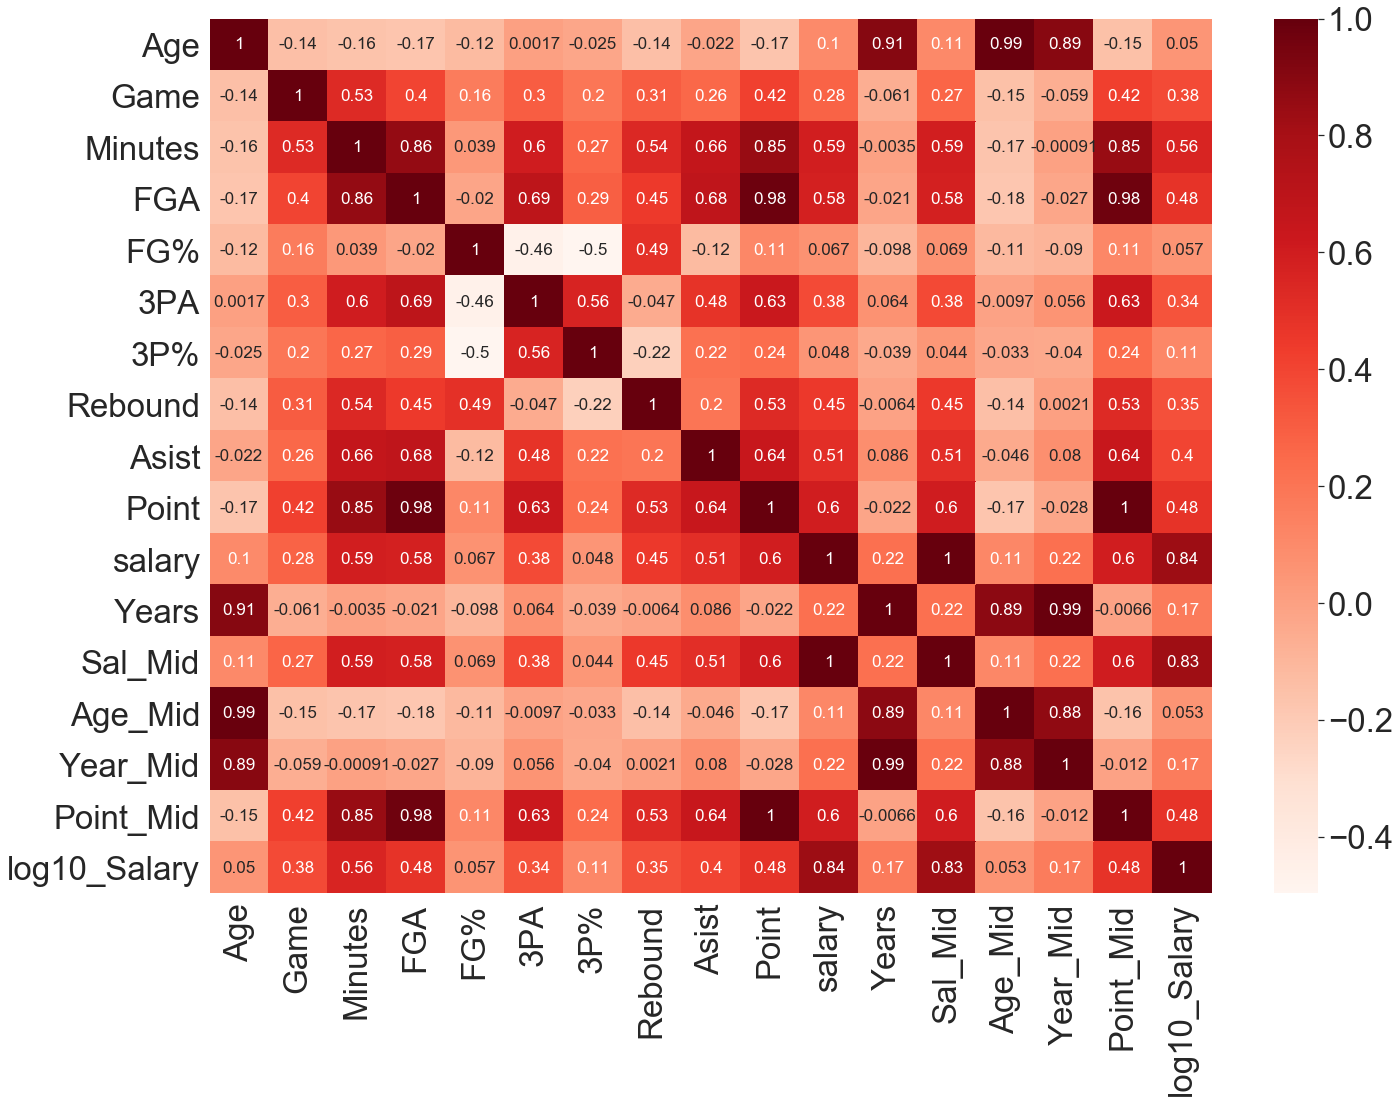

In [62]:
#Let's see the high correlations on the heat map
plt.figure(figsize=(20,15))
sns.heatmap(df1.corr(), cmap='Reds', annot=True, annot_kws={"size": 17})

### Correlations between dependent(salary) and independent variables(stats)

<font color='brown'>When we just take a look at the heat map and the correlations between salary(dependent variable) and other stats(independent variables), 
These independent variable are highly correlated with our dependent variable salary -> 

'Point' :0.6, 
'Asist':0.51, 
'Rebound': 0.45,
'FGA'(Field Goal attemp): 0.58, 
'Minutes':0.59, and 
'3PA'(3 point attemp):0.38.

The reason why age and years are not correlated is because we drop the rookie players who have 3 or less years experience, and mostly younger.</font> 

### Correlations between independent variables(stats)

<font color='red'>When we just take a deeper look at the heat map and the correlations between independent variables, 
These independent variables are highly correlated with each other -><font> 

<font color='blue'>'Point' : 'FGA' = 0.98, The more shoot trial the more points.
    
 'Point' : 'Asist'   = 0.64, The more assist to teammate the more shooting trials. 
     
 'Point' : 'Minutes' = 0.85, The longer staying in the game the more chance to score.<font>
    
 <font color='red'>There is also negative correlation between rebound and 3P%, we can easily say that Center players are not good at shooting 3 points.<font>
    
 <font color='blue'>'Rebound' : '3P%'(3 point percentage) = -0.22.

<font> 

In [103]:
# Let's look at teh correlations with Pearson correlation coefficient r = +1 positive correlation. r = 0 no correlation.
def pearson_r(x, y):
    corr_mat=np.corrcoef(x,y)
    return corr_mat[0,1]
point_salary=pearson_r(df1['Point'],df1['salary'])
asist_salary=pearson_r(df1['Asist'],df1['salary'])
rebound_salary=pearson_r(df1['Rebound'],df1['salary'])
field_goal_salary=pearson_r(df1['FGA'],df1['salary'])
minutes_salary=pearson_r(df1['Minutes'],df1['salary'])
three_point_salary=pearson_r(df1['3PA'],df1['salary'])

print("Pearson correlation coefficient between {}".format('point'), "and between {}".format('salary'),"is {:0.3f}".format(point_salary))
print("Pearson correlation coefficient between {}".format('minutes'), "and between {}".format('salary'),"is {:0.3f}".format(minutes_salary))
print("Pearson correlation coefficient between {}".format('asist'), "and between {}".format('salary'),"is {:0.3f}".format(asist_salary))
print("Pearson correlation coefficient between {}".format('field-goal'), "and between {}".format('salary'),"is {:0.3f}".format(field_goal_salary))
print("Pearson correlation coefficient between {}".format('rebound'), "and between {}".format('salary'),"is {:0.3f}".format(rebound_salary))
print("Pearson correlation coefficient between {}".format('three-points'), "and between {}".format('salary'),"is {:0.3f}".format(three_point_salary))


Pearson correlation coefficient between point and between salary is 0.599
Pearson correlation coefficient between minutes and between salary is 0.595
Pearson correlation coefficient between asist and between salary is 0.508
Pearson correlation coefficient between field-goal and between salary is 0.581
Pearson correlation coefficient between rebound and between salary is 0.450
Pearson correlation coefficient between three-points and between salary is 0.378


### Z-Test for Salary and other stats(point, asist, rebound, years, age, field goal)

In [81]:
center = df1.groupby('Position')['Rebound'].mean()
center

Position
C     6.594915
PF    5.042000
PG    3.319149
SF    4.172973
SG    3.023636
Name: Rebound, dtype: float64

In [79]:
# mean of salary is higher than median, which is caused by some supoerstar players who make far beyond the most players.
df1['salary'].median(), df1['Sal_Mid'].median(), df1['salary'].mean(), df1['Sal_Mid'].mean()

(7410852.5, 8.0, 10008315.733870968, 10.064516129032258)

## T-Test for salary and point
#### H0 = Null Hypothesis => Salaries of players scoring more than median-point are not significantly different than salaries of those scoring less than median-point.
#### HA = Alternative Hypothesis => There is significant difference.

In [94]:
from statsmodels.stats.weightstats import ztest

median_point = df1['Point'].median()
players_above_median = df1[df1['Point'] > median_point]
players_below_median = df1[df1['Point'] <= median_point]

a, p = ztest(players_above_median['salary'], players_below_median['salary'], value=0)
print("p-value is {:0.3f}".format(p),' and z-test is ', a)

a, p = stats.ttest_ind(players_above_median['salary'], players_below_median['salary'])
print("p-value is {:0.3f}".format(p),' and t-value is', a)

p-value is 0.000  and z-test is  8.389248306671679
p-value is 0.000  and t-value is 8.389248306671679


<font color='blue'>Since p-value is zero, we reject the null hypothesis, and salaries of players score above median point ARE significantly different than those who score less than median point.</font>

## T-Test for salary and position
#### H0 = Null Hypothesis => Salaries of center players are not significantly different than salaries of point guard players.
#### HA = Alternative Hypothesis => There is significant difference between salaries of different positions.

In [105]:
center = df1[df1['Position'] == 'C']
point_guard = df1[df1['Position'] == 'PG']

a, p = stats.ttest_ind(point_guard['salary'], center['salary'])
print("p-value is {:0.3f}".format(p),' and t-value is', a)


p-value is 0.344  and t-value is 0.9515878705510601


<font color='red'>Since p-value is 0.344 more than 0.05, we failed to reject the null hypothesis, and salaries of center players ARE NOT significantly different than point guard players.</font>

## T-Test for center position and rebound
#### H0 = Null Hypothesis => Salaries of center players collecting more rebound than median rebound are not significantly different than salaries of center players collecting less rebound than median rebound.

#### HA = Alternative Hypothesis => There is a significant difference between salaries of Center players collecting less and more rebound than median rebound..

In [104]:
center_above = df1[df1['Position'] == 'C']
center_below = df1[df1['Position'] == 'C']
center_above = center_above[center_above['Rebound'] > 6]
center_below = center_below[center_below['Rebound'] < 6]
a, p = stats.ttest_ind(center_above['salary'], center_below['salary'])
print("p-value is {:0.3f}".format(p),' and t-value is', a)

p-value is 0.000  and t-value is 4.051566466816782


<font color='blue'>Since p-value is 0.000 less than 0.05, we reject the null hypothesis, and salaries of center players collecting more than 6 rebounds ARE significantly different than center players collecting less than 6 rebounds.</font>

## T-Test for C position and PG posiiton based on points and minutes.
#### H0 = Null Hypothesis =>Center players are staying in the game as long as point guard players.
#### H01 = Null Hypothesis =>Center players are scoring per game as much as point guard players.

#### HA = Alternative Hypothesis => There is significant difference between minutes of Center players and minutes of PG players.
#### HA1 = Alternative Hypothesis => There is significant difference between points of Center players and points of PG players.

In [139]:
center = df1[df1['Position'] == 'C']
point_guard = df1[df1['Position'] == 'PG']

a1, p1 = stats.ttest_ind(point_guard['Minutes'], center['Minutes'])
print("p-value is {:0.3f}".format(p1),' and t-value is', a1, 'for minutes')
a2, p2 = stats.ttest_ind(point_guard['Point'], center['Point'])
print("p-value is {:0.3f}".format(p2),' and t-value is', a2, 'for point')


p-value is 0.002  and t-value is 3.2143507802050766 for minutes
p-value is 0.038  and t-value is 2.102429387246607 for point


<font color='blue'>Since p-value is 0.002 less than 0.05 for minutes, we reject the null hypothesis, and there is a statistically significant difference between minutes of PG and C players.</font>

<font color='blue'>Since p-value is 0.038 less than 0.05, we reject the null hypothesis, and there is a statistically significant difference between points of PG and C players.</font>